# Importation des librairies

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
import warnings

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

import joblib

#warnings.filterwarnings("ignore")

# Lecture du fichier data_cleaned_final_sans_dummies.csv

In [5]:
file = open('../../../conf/global_conf.yml', 'r') 
conf = yaml.safe_load(file)
df = pd.read_csv(conf['local_data_path'] + "data_cleaned_final_sans_dummies.csv",index_col=0,low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 447136 entries, 0 to 494017
Data columns (total 41 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   jour            447136 non-null  int64  
 1   mois            447136 non-null  int64  
 2   an              447136 non-null  int64  
 3   lum             447136 non-null  float64
 4   dep             447136 non-null  object 
 5   agg             447136 non-null  int64  
 6   int             447136 non-null  float64
 7   atm             447136 non-null  float64
 8   col             447136 non-null  float64
 9   lat             447136 non-null  float64
 10  long            447136 non-null  float64
 11  catr            447136 non-null  int64  
 12  circ            447136 non-null  float64
 13  prof            447136 non-null  float64
 14  plan            447136 non-null  float64
 15  surf            447136 non-null  float64
 16  infra           447136 non-null  float64
 17  situ           

In [6]:
cat = ['lum', 'agg', 'int', 'atm', 'col', 'catr', 'circ',
       'prof', 'plan', 'surf', 'infra', 'situ', 'grav', 'sexe', 'catv', 'obs',
       'obsm', 'manv', 'motor', 'weekend', 'place_rec',
       'eq_ceinture', 'eq_casque', 'eq_siege', 'eq_gilet', 'eq_airbag',
       'eq_gants', 'eq_indetermine', 'eq_autre', 'jour_chome', 'prox_pt_choc']
df[cat] = df[cat].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 447136 entries, 0 to 494017
Data columns (total 41 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   jour            447136 non-null  int64  
 1   mois            447136 non-null  int64  
 2   an              447136 non-null  int64  
 3   lum             447136 non-null  int64  
 4   dep             447136 non-null  object 
 5   agg             447136 non-null  int64  
 6   int             447136 non-null  int64  
 7   atm             447136 non-null  int64  
 8   col             447136 non-null  int64  
 9   lat             447136 non-null  float64
 10  long            447136 non-null  float64
 11  catr            447136 non-null  int64  
 12  circ            447136 non-null  int64  
 13  prof            447136 non-null  int64  
 14  plan            447136 non-null  int64  
 15  surf            447136 non-null  int64  
 16  infra           447136 non-null  int64  
 17  situ           

# Création de la colonne 'catv_percute"

In [7]:
df['catv_percute'] =  df['catv']

In [8]:
df['catv'] = df.apply(lambda x : 6 if x['place_rec'] == 4 else x['catv'], axis = 1)

In [9]:
df['catv_percute'] = df.apply(lambda x : 6 if x['place_rec'] != 4 else x['catv_percute'], axis = 1)

In [10]:
df['obs'] = df.apply(lambda x : 0 if x['place_rec'] == 4 else x['obs'], axis = 1)

In [11]:
df['obsm'] = df.apply(lambda x : 0 if x['place_rec'] == 4 else x['obsm'], axis = 1)

# Séparation en train et test

Suppression des colonnes qui ne serviront pas pour la modélisation

In [12]:
df = df.drop(['an', 'jour', 'grav_rec', 'date', 'dep'], axis = 1)

Séparation des données de la cible

In [13]:
X = df.drop('grav', axis = 1)
y = df['grav']

y.value_counts(normalize = True)

grav
1    0.412733
4    0.403430
3    0.156550
2    0.027287
Name: proportion, dtype: float64

Séparation en train et test en gardant la même porportion de chque modalité de la cible dans les jeux d'entraînement et de test.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

grav
1    0.412733
4    0.403430
3    0.156549
2    0.027288
Name: proportion, dtype: float64
grav
1    0.412733
4    0.403430
3    0.156552
2    0.027285
Name: proportion, dtype: float64


In [15]:
X_train.shape

(335352, 36)

# Random Forest

### Selection des variables

In [16]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train, y_train)

In [17]:
print("Train acuracy :", np.round(rf.score(X_train, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(rf.score(X_test, y_test) * 100, 2), "%")
print()
y_pred = rf.predict(X_test)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 99.9 %
Test acuracy :  66.79 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37842,21,1129,7145
2,402,163,1587,898
3,2426,150,7126,7798
4,11662,70,3840,29525



Rapport de classification :
               precision    recall  f1-score   support

           1       0.72      0.82      0.77     46137
           2       0.40      0.05      0.09      3050
           3       0.52      0.41      0.46     17500
           4       0.65      0.65      0.65     45097

    accuracy                           0.67    111784
   macro avg       0.57      0.48      0.49    111784
weighted avg       0.65      0.67      0.65    111784



Calcul de l'importance de chaque variable

In [18]:
importances_rf = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances_rf = importances_rf.sort_values('importance',ascending=False).set_index('feature')
importances_rf.head(38)

,importance
feature,
lat,0.111
long,0.106
age_usager,0.103
heure,0.071
mois,0.060
col,0.045
catv,0.044
obsm,0.044
eq_ceinture,0.040


Recherche du nombre de variables permettant d'obtenir la meilleur accuracy

In [19]:
nombre_variable = []
scores = []

for i in np.arange(1, len(importances_rf), 1):
    liste_var = importances_rf.index[0 : i]
    X_train_2 = X_train[liste_var]
    X_test_2 = X_test[liste_var]

    rf_2 = RandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train_2, y_train)

    score = rf_2.score(X_test_2, y_test)
    
    nombre_variable.append(i)
    scores.append(score)
 
dico = {'nombre_variable' : nombre_variable,
        'scores' : scores}   

y_pred_tableau_rf = pd.DataFrame(dico)
y_pred_tableau_rf = y_pred_tableau_rf.sort_values(by = 'scores', ascending = False)
y_pred_tableau_rf.head(5)

,nombre_variable,scores
30,31,0.668969
34,35,0.668101
29,30,0.668029
33,34,0.667788
28,29,0.667332


In [20]:
nb_variable_rf = y_pred_tableau_rf.iloc[0]['nombre_variable']
print("La meilleur accuracy est obtenue avec", nb_variable_rf, 'variables')

La meilleur accuracy est obtenue avec 31.0 variables


In [21]:
meilleurs_variables_rf = importances_rf.index[0 : int(nb_variable_rf)]
meilleurs_variables_rf

Index(['lat', 'long', 'age_usager', 'heure', 'mois', 'col', 'catv', 'obsm',
       'eq_ceinture', 'catr', 'place_rec', 'eq_casque', 'manv', 'lum', 'agg',
       'motor', 'sexe', 'obs', 'infra', 'weekend', 'prox_pt_choc', 'prof',
       'jour_chome', 'situ', 'int', 'circ', 'surf', 'atm', 'eq_indetermine',
       'plan', 'catv_percute'],
      dtype='object', name='feature')

In [22]:
liste_var = importances_rf.index[0 : int(nb_variable_rf)]
X_train_rf = X_train[liste_var]
X_test_rf = X_test[liste_var]

rf = RandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train_rf, y_train)

In [23]:
print("Train acuracy :", np.round(rf.score(X_train_rf, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(rf.score(X_test_rf, y_test) * 100, 2), "%")
print()
y_pred = rf.predict(X_test_rf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 99.89 %
Test acuracy :  66.9 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,37941,22,1120,7054
2,407,180,1554,909
3,2407,153,7199,7741
4,11705,62,3870,29460



Rapport de classification :
               precision    recall  f1-score   support

           1       0.72      0.82      0.77     46137
           2       0.43      0.06      0.10      3050
           3       0.52      0.41      0.46     17500
           4       0.65      0.65      0.65     45097

    accuracy                           0.67    111784
   macro avg       0.58      0.49      0.50    111784
weighted avg       0.66      0.67      0.66    111784



### Hyperparamétrage

In [24]:
liste_var_rf = ['lat', 'long', 'age_usager', 'heure', 'mois', 'col', 'catv', 'obsm',
       'eq_ceinture', 'catr', 'place_rec', 'eq_casque', 'manv', 'lum', 'agg',
       'motor', 'sexe', 'obs', 'infra', 'weekend', 'prox_pt_choc', 'prof',
       'jour_chome', 'situ', 'int', 'circ', 'surf', 'atm', 'eq_indetermine',
       'plan', 'catv_percute']
X_train_rf = X_train[liste_var_rf]
X_test_rf = X_test[liste_var_rf]

rf = RandomForestClassifier(n_jobs = -1, random_state = 42).fit(X_train_rf, y_train)

##### Avec class_weight = None

In [25]:
params_rf = {'n_estimators' : [100],
             'criterion' : ['gini', 'entropy'],
             'max_depth' : [10, 20, None],
             'min_samples_split' : [2, 10, 20],
             'min_samples_leaf' : [1, 10, 20],
             'bootstrap' : [False, True],
             'n_jobs' : [-1],
             'random_state' : [42],
             'class_weight' : [None]}     

In [26]:
grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5).fit(X_train_rf, y_train)
print(pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:, ['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'bootstrap': False, 'class_weight': None, 'cr...         0.645754
1    {'bootstrap': False, 'class_weight': None, 'cr...         0.645361
2    {'bootstrap': False, 'class_weight': None, 'cr...         0.645444
3    {'bootstrap': False, 'class_weight': None, 'cr...         0.645391
4    {'bootstrap': False, 'class_weight': None, 'cr...         0.645391
..                                                 ...              ...
103  {'bootstrap': True, 'class_weight': None, 'cri...         0.664183
104  {'bootstrap': True, 'class_weight': None, 'cri...         0.664183
105  {'bootstrap': True, 'class_weight': None, 'cri...         0.660944
106  {'bootstrap': True, 'class_weight': None, 'cri...         0.660944
107  {'bootstrap': True, 'class_weight': None, 'cri...         0.660944

[108 rows x 2 columns]


In [27]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.6697291323530571


In [28]:
print("Train acuracy :", np.round(grid_rf.score(X_train_rf, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_rf.score(X_test_rf, y_test) * 100, 2), "%")
print()
y_pred = grid_rf.predict(X_test_rf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 83.21 %
Test acuracy :  67.24 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,38865,7,959,6306
2,430,108,1607,905
3,2532,69,6849,8050
4,12254,20,3484,29339



Rapport de classification :
               precision    recall  f1-score   support

           1       0.72      0.84      0.78     46137
           2       0.53      0.04      0.07      3050
           3       0.53      0.39      0.45     17500
           4       0.66      0.65      0.65     45097

    accuracy                           0.67    111784
   macro avg       0.61      0.48      0.49    111784
weighted avg       0.66      0.67      0.66    111784



Recherche du meilleur max_depth

In [58]:
params_rf = {'n_estimators' : [100],
             'criterion' : ['gini'],
             'max_depth' : [16],
             'min_samples_split' : [10],
             'min_samples_leaf' : [1],
             'bootstrap' : [False],
             'n_jobs' : [-1],
             'random_state' : [42],
             'class_weight' : [None]}        

grid_rf_2 = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5, scoring = 'f1_macro').fit(X_train_rf, y_train)

In [59]:
print(grid_rf_2.best_params_)
print(grid_rf_2.best_score_)

{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.47554196860272235


In [60]:
y_train_pred = grid_rf_2.predict(X_train_rf)
y_test_pred = grid_rf_2.predict(X_test_rf)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 74.99 %
Test acuracy :  66.83 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,39316,6,864,5951
2,486,70,1557,937
3,2680,48,6467,8305
4,13103,15,3124,28855



Rapport de classification :
               precision    recall  f1-score   support

           1       0.71      0.85      0.77     46137
           2       0.50      0.02      0.04      3050
           3       0.54      0.37      0.44     17500
           4       0.66      0.64      0.65     45097

    accuracy                           0.67    111784
   macro avg       0.60      0.47      0.48    111784
weighted avg       0.65      0.67      0.65    111784



##### Avec class_weight = 'balanced'

In [29]:
params_rf = {'n_estimators' : [100],
            'criterion' : ['gini', 'entropy'],
            'max_depth' : [10, 20, None],
            'min_samples_split' : [2, 10, 20],
            'min_samples_leaf' : [1, 10, 20],
            'bootstrap' : [False, True],
            'n_jobs' : [-1],
            'random_state' : [42],
            'class_weight' : ['balanced']}    

In [30]:
grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5).fit(X_train_rf, y_train)
print(pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:, ['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'bootstrap': False, 'class_weight': 'balanced...         0.580336
1    {'bootstrap': False, 'class_weight': 'balanced...         0.580751
2    {'bootstrap': False, 'class_weight': 'balanced...         0.580462
3    {'bootstrap': False, 'class_weight': 'balanced...         0.579734
4    {'bootstrap': False, 'class_weight': 'balanced...         0.579734
..                                                 ...              ...
103  {'bootstrap': True, 'class_weight': 'balanced'...         0.633683
104  {'bootstrap': True, 'class_weight': 'balanced'...         0.633683
105  {'bootstrap': True, 'class_weight': 'balanced'...         0.616713
106  {'bootstrap': True, 'class_weight': 'balanced'...         0.616713
107  {'bootstrap': True, 'class_weight': 'balanced'...         0.616713

[108 rows x 2 columns]


In [31]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.6640723842162085


In [32]:
print("Train acuracy :", np.round(grid_rf.score(X_train_rf, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_rf.score(X_test_rf, y_test) * 100, 2), "%")
print()
y_pred = grid_rf.predict(X_test_rf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 99.89 %
Test acuracy :  66.79 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,38274,26,1140,6697
2,407,193,1524,926
3,2494,185,6919,7902
4,12118,74,3636,29269



Rapport de classification :
               precision    recall  f1-score   support

           1       0.72      0.83      0.77     46137
           2       0.40      0.06      0.11      3050
           3       0.52      0.40      0.45     17500
           4       0.65      0.65      0.65     45097

    accuracy                           0.67    111784
   macro avg       0.57      0.48      0.50    111784
weighted avg       0.65      0.67      0.65    111784



Recherche du meilleur max_depth

In [67]:
params_rf = {'n_estimators' : [100],
            'criterion' : ['entropy'],
            'max_depth' : [14],
            'min_samples_split' : [2],
            'min_samples_leaf' : [1],
            'bootstrap' : [True],
            'n_jobs' : [-1],
            'random_state' : [42],
            'class_weight' : ['balanced']}   

grid_rf_2 = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5, scoring = 'f1_macro').fit(X_train_rf, y_train)

In [68]:
print(grid_rf_2.best_params_)
print(grid_rf_2.best_score_)

{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.510367084977501


In [69]:
y_train_pred = grid_rf_2.predict(X_train_rf)
y_test_pred = grid_rf_2.predict(X_test_rf)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 68.64 %
Test acuracy :  62.41 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,39088,903,2429,3717
2,280,1303,1172,295
3,2177,2966,9081,3276
4,13953,1706,9147,20291



Rapport de classification :
               precision    recall  f1-score   support

           1       0.70      0.85      0.77     46137
           2       0.19      0.43      0.26      3050
           3       0.42      0.52      0.46     17500
           4       0.74      0.45      0.56     45097

    accuracy                           0.62    111784
   macro avg       0.51      0.56      0.51    111784
weighted avg       0.66      0.62      0.62    111784



##### Recherche du meilleur class_weight

In [33]:
params_rf = {'n_estimators' : [100],
            'criterion' : ['gini', 'entropy'],
            'max_depth' : [10, 20, None],
            'min_samples_split' : [2, 10, 20],
              'min_samples_leaf' : [1, 10, 20],
            'bootstrap' : [False, True],
            'n_jobs' : [-1],
            'random_state' : [42],
            'class_weight' : [{1: 1, 2: 4, 3: 1, 4: 1}]} 

In [34]:
grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5).fit(X_train_rf, y_train)
print(pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:, ['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'bootstrap': False, 'class_weight': {1: 1, 2:...         0.636000
1    {'bootstrap': False, 'class_weight': {1: 1, 2:...         0.636370
2    {'bootstrap': False, 'class_weight': {1: 1, 2:...         0.637074
3    {'bootstrap': False, 'class_weight': {1: 1, 2:...         0.636138
4    {'bootstrap': False, 'class_weight': {1: 1, 2:...         0.636138
..                                                 ...              ...
103  {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.657494
104  {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.657494
105  {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.651635
106  {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.651635
107  {'bootstrap': True, 'class_weight': {1: 1, 2: ...         0.651635

[108 rows x 2 columns]


In [35]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'bootstrap': True, 'class_weight': {1: 1, 2: 4, 3: 1, 4: 1}, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.6669439959809107


In [36]:
print("Train acuracy :", np.round(grid_rf.score(X_train_rf, y_train) * 100, 2), "%")
print("Test acuracy : ", np.round(grid_rf.score(X_test_rf, y_test) * 100, 2), "%")
print()
y_pred = grid_rf.predict(X_test_rf)
print("Matrice de confusion :")
display(pd.crosstab(y_test, y_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Train acuracy : 86.34 %
Test acuracy :  66.98 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,38928,88,917,6204
2,413,379,1346,912
3,2510,495,6370,8125
4,12423,197,3276,29201



Rapport de classification :
               precision    recall  f1-score   support

           1       0.72      0.84      0.78     46137
           2       0.33      0.12      0.18      3050
           3       0.53      0.36      0.43     17500
           4       0.66      0.65      0.65     45097

    accuracy                           0.67    111784
   macro avg       0.56      0.49      0.51    111784
weighted avg       0.65      0.67      0.66    111784



Recherche du meilleur max_depth

In [70]:
params_rf = {'n_estimators' : [100],
            'criterion' : ['gini'],
            'max_depth' : [14],
            'min_samples_split' : [2],
              'min_samples_leaf' : [1],
            'bootstrap' : [True],
            'n_jobs' : [-1],
            'random_state' : [42],
            'class_weight' : [{1: 1, 2: 4, 3: 1, 4: 1}]} 

grid_rf_2 = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 5, scoring = 'f1_macro').fit(X_train_rf, y_train)

In [71]:
print(grid_rf_2.best_params_)
print(grid_rf_2.best_score_)

{'bootstrap': True, 'class_weight': {1: 1, 2: 4, 3: 1, 4: 1}, 'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
0.504257844524413


In [72]:
y_train_pred = grid_rf_2.predict(X_train_rf)
y_test_pred = grid_rf_2.predict(X_test_rf)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 71.32 %
Test acuracy :  65.55 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,39543,227,598,5769
2,483,760,863,944
3,2798,1357,4655,8690
4,13843,526,2414,28314



Rapport de classification :
               precision    recall  f1-score   support

           1       0.70      0.86      0.77     46137
           2       0.26      0.25      0.26      3050
           3       0.55      0.27      0.36     17500
           4       0.65      0.63      0.64     45097

    accuracy                           0.66    111784
   macro avg       0.54      0.50      0.51    111784
weighted avg       0.64      0.66      0.64    111784



# Meilleur modèle

In [16]:
# Variables retenues lors de l'entraînement du modèle brut
liste_var_rf = ['lat', 'long', 'age_usager', 'heure', 'mois', 'col', 'catv', 'obsm',
       'eq_ceinture', 'catr', 'place_rec', 'eq_casque', 'manv', 'lum', 'agg',
       'motor', 'sexe', 'obs', 'infra', 'weekend', 'prox_pt_choc', 'prof',
       'jour_chome', 'situ', 'int', 'circ', 'surf', 'atm', 'eq_indetermine',
       'plan', 'catv_percute']
X_train_rf = X_train[liste_var_rf]
X_test_rf = X_test[liste_var_rf]

In [17]:
best_model = RandomForestClassifier(bootstrap = True, 
                                    class_weight = 'balanced', 
                                    criterion = 'entropy', 
                                    max_depth = 13, 
                                    min_samples_leaf = 1, 
                                    min_samples_split = 2, 
                                    n_estimators = 100, 
                                    n_jobs = -1, 
                                    random_state = 42).fit(X_train_rf, y_train)

y_train_pred = best_model.predict(X_train_rf)
y_test_pred = best_model.predict(X_test_rf)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 65.83 %
Test acuracy :  61.39 %

Matrice de confusion :


Classes prédites,1,2,3,4
Classes réelles,,,,
1,39227,1108,2415,3387
2,290,1483,1020,257
3,2205,3503,8716,3076
4,14445,2089,9368,19195



Rapport de classification :
               precision    recall  f1-score   support

           1       0.70      0.85      0.77     46137
           2       0.18      0.49      0.26      3050
           3       0.41      0.50      0.45     17500
           4       0.74      0.43      0.54     45097

    accuracy                           0.61    111784
   macro avg       0.51      0.57      0.50    111784
weighted avg       0.66      0.61      0.61    111784



In [18]:
precision_score(y_test, y_test_pred, average = None)

array([0.69839942, 0.18122938, 0.40503741, 0.74069072])

In [19]:
recall_score(y_test, y_test_pred, average = None)

array([0.85022867, 0.48622951, 0.49805714, 0.42563807])

# Réentrainement avec changement de l'ordre des modalités de 'grav' pour l'affichage streamlit

In [20]:
y_train

135492    4
61030     4
97417     4
464936    3
256701    4
         ..
181495    3
453088    3
164103    4
172847    2
463162    1
Name: grav, Length: 335352, dtype: int64

In [21]:
# Modification de l'odre des modalités de 'grav' : 0 - indemenes, 1 - blessés légers, 2 - blessés hospitalisés, 3 - tués
y_train = y_train.replace([1, 2, 3, 4], ['ind', 'tue', 'bh', 'bl'])
y_train = y_train.replace(['ind', 'tue', 'bh', 'bl'], [0, 3, 2, 1])

y_test = y_test.replace([1, 2, 3, 4], ['ind', 'tue', 'bh', 'bl'])
y_test = y_test.replace(['ind', 'tue', 'bh', 'bl'], [0, 3, 2, 1])

In [22]:
y_train

135492    1
61030     1
97417     1
464936    2
256701    1
         ..
181495    2
453088    2
164103    1
172847    3
463162    0
Name: grav, Length: 335352, dtype: int64

In [23]:
# Variables retenues lors de l'entraînement du modèle brut
liste_var_rf = ['lat', 'long', 'age_usager', 'heure', 'mois', 'col', 'catv', 'obsm',
       'eq_ceinture', 'catr', 'place_rec', 'eq_casque', 'manv', 'lum', 'agg',
       'motor', 'sexe', 'obs', 'infra', 'weekend', 'prox_pt_choc', 'prof',
       'jour_chome', 'situ', 'int', 'circ', 'surf', 'atm', 'eq_indetermine',
       'plan', 'catv_percute']
X_train_rf = X_train[liste_var_rf]
X_test_rf = X_test[liste_var_rf]

In [24]:
best_model = RandomForestClassifier(bootstrap = True, 
                                    class_weight = 'balanced', 
                                    criterion = 'entropy', 
                                    max_depth = 13, 
                                    min_samples_leaf = 1, 
                                    min_samples_split = 2, 
                                    n_estimators = 100, 
                                    n_jobs = -1, 
                                    random_state = 42).fit(X_train_rf, y_train)

y_train_pred = best_model.predict(X_train_rf)
y_test_pred = best_model.predict(X_test_rf)
print("Train acuracy :", np.round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Test acuracy : ", np.round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print()

print("Matrice de confusion :")
display(pd.crosstab(y_test, y_test_pred, rownames = ['Classes réelles'], colnames = ['Classes prédites']))
print()
print("Rapport de classification :\n", classification_report(y_test, y_test_pred))

Train acuracy : 65.83 %
Test acuracy :  61.36 %

Matrice de confusion :


Classes prédites,0,1,2,3
Classes réelles,,,,
0,39254,3330,2447,1106
1,14474,19022,9518,2083
2,2178,2995,8846,3481
3,299,249,1037,1465



Rapport de classification :
               precision    recall  f1-score   support

           0       0.70      0.85      0.77     46137
           1       0.74      0.42      0.54     45097
           2       0.40      0.51      0.45     17500
           3       0.18      0.48      0.26      3050

    accuracy                           0.61    111784
   macro avg       0.51      0.56      0.50    111784
weighted avg       0.66      0.61      0.61    111784



In [25]:
joblib.dump(best_model, "../../../data/saved_models/RandomForest_4classes_catv_percute.joblib")

['../../../data/saved_models/RandomForest_4classes_catv_percute.joblib']

In [33]:
score_train = best_model.score(X_train_rf, y_train)
score_test = best_model.score(X_test_rf, y_test)
print(f"Le score sur le jeu d'entraînement est de {score_train}, et de {score_test} sur le jeu de test.")

Le score sur le jeu d'entraînement est de 0.6582814475536153, et de 0.6135672368138553 sur le jeu de test.


                precision    recall  f1-score        support
Indemnes         0.698408  0.850814  0.767114   46137.000000
Blessés légers   0.743163  0.421802  0.538158   45097.000000
Blessés graves   0.404888  0.505486  0.449629   17500.000000
Tués             0.180086  0.480328  0.261958    3050.000000
accuracy         0.613567  0.613567  0.613567       0.613567
macro avg        0.506636  0.564607  0.504215  111784.000000
weighted avg     0.656370  0.613567  0.611260  111784.000000


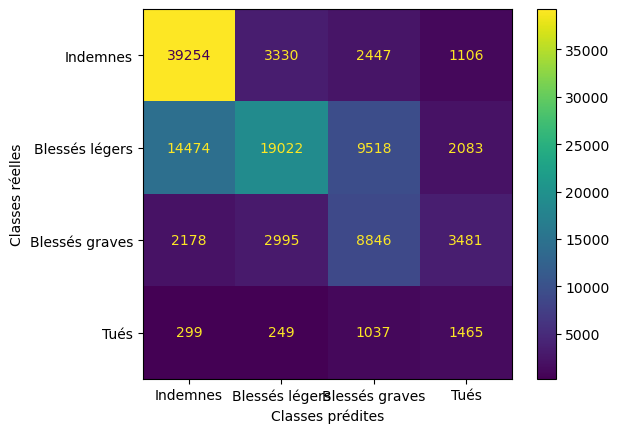

In [35]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay.from_estimator(
       best_model,
       X_test_rf,
       y_test,
       display_labels=['Indemnes', 'Blessés légers', 'Blessés graves', 'Tués']
   )
disp.ax_.set(xlabel='Classes prédites', ylabel='Classes réelles')
plt.grid(False)
plt.savefig(conf['local_data_path'] + 'img/rf_4classes_catv_percute_confusion_matrix' + '.png')


cr= classification_report(y_test, y_test_pred,
target_names=['Indemnes', 'Blessés légers', 'Blessés graves', 'Tués'],
output_dict=True)
df_cr = pd.DataFrame(cr).transpose()
print(df_cr)
df_cr.to_csv(conf['local_data_path'] + 'img/rf_4classes_catv_percute_report' + '.csv')